UAS BIG DATA DAN DATA MINING
---
21.11.3844 - Haifzh Mohammad Fathan


---
Analisis clustering pada pasien sirosis - Agglomerative Hierarchical Clustering




## mengambil dataset

In [ ]:
#https://drive.google.com/file/d/1qnVI2zEF6occwrL8_VJAyoXfN2KOdicE/view?usp=sharing
!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1583kSe2k2sKAK5mcx6oghhHvFW37Q8xD' -O liver_disease_dataset.csv

--2024-01-06 11:46:26--  https://drive.google.com/uc?export=download&id=1583kSe2k2sKAK5mcx6oghhHvFW37Q8xD
Resolving drive.google.com (drive.google.com)... 142.250.125.113, 142.250.125.139, 142.250.125.102, ...
Connecting to drive.google.com (drive.google.com)|142.250.125.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0g-1k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/1ldf0lvepvao4qc5d3u004krgkf4dqgj/1704541575000/17413099561548057696/*/1583kSe2k2sKAK5mcx6oghhHvFW37Q8xD?e=download&uuid=a9286a63-47e2-45ba-9acd-3ac33c5c6646 [following]
--2024-01-06 11:46:27--  https://doc-0g-1k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/1ldf0lvepvao4qc5d3u004krgkf4dqgj/1704541575000/17413099561548057696/*/1583kSe2k2sKAK5mcx6oghhHvFW37Q8xD?e=download&uuid=a9286a63-47e2-45ba-9acd-3ac33c5c6646
Resolving doc-0g-1k-docs.googleusercontent.com (doc-0g-1k-docs.googleusercontent.com)... 108.177.120.132, 

## inisiasi

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
from sklearn.metrics import silhouette_score



##import data dan PreProsesing data

In [ ]:
# Baca dataset menjadi dataframe
df = pd.read_csv('liver_disease_dataset.csv')
df.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

In [ ]:
# Menggantikan nilai 'NA' dengan NaN
df.replace('NA', pd.NA, inplace=True)
# Menghapus baris dengan nilai NaN
df.dropna(inplace=True)

In [ ]:
mapping_status = {'C': 0, 'CL': 1, 'D': 2}
df['Status'] = df['Status'].map(mapping_status)

mapping_drug = {'D-penicillamine': 0, 'placebo': 1}
df['Drug'] = df['Drug'].map(mapping_drug)

mapping_sex = {'M': 0, 'F': 1}
df['Sex'] = df['Sex'].map(mapping_sex)

mapping_binary = {'N': 0, 'Y': 1}
df['Ascites'] = df['Ascites'].map(mapping_binary)
df['Hepatomegaly'] = df['Hepatomegaly'].map(mapping_binary)
df['Spiders'] = df['Spiders'].map(mapping_binary)

mapping_edema = {'N': 0, 'S': 1, 'Y': 2}
df['Edema'] = df['Edema'].map(mapping_edema)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 276 entries, 0 to 311
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             276 non-null    int64  
 1   N_Days         276 non-null    int64  
 2   Status         276 non-null    int64  
 3   Drug           136 non-null    float64
 4   Age            276 non-null    int64  
 5   Sex            276 non-null    int64  
 6   Ascites        276 non-null    int64  
 7   Hepatomegaly   276 non-null    int64  
 8   Spiders        276 non-null    int64  
 9   Edema          276 non-null    int64  
 10  Bilirubin      276 non-null    float64
 11  Cholesterol    276 non-null    float64
 12  Albumin        276 non-null    float64
 13  Copper         276 non-null    float64
 14  Alk_Phos       276 non-null    float64
 15  SGOT           276 non-null    float64
 16  Tryglicerides  276 non-null    float64
 17  Platelets      276 non-null    float64
 18  Prothrombi

In [ ]:
df.describe()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,276.000000,276.000000,276.000000,136.0,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000
mean,158.615942,1979.166667,0.869565,0.0,18189.326087,0.876812,0.068841,0.514493,0.289855,0.213768,3.333696,371.260870,3.516812,100.768116,1996.611594,124.119239,124.978261,261.771739,10.735507,3.039855
std,91.662926,1112.380295,0.959743,0.0,3843.555619,0.329250,0.253643,0.500698,0.454519,0.540665,4.601074,234.788363,0.404789,88.268746,2115.477894,56.719952,65.280761,93.128857,1.008315,0.853999
min,1.000000,41.000000,0.000000,0.0,9598.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.300000,120.000000,1.960000,4.000000,289.000000,28.380000,33.000000,62.000000,9.000000,1.000000
25%,79.750000,1185.750000,0.000000,0.0,15162.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.800000,249.500000,3.310000,42.750000,922.500000,82.457500,85.000000,200.000000,10.000000,2.000000
50%,157.500000,1788.000000,0.000000,0.0,18156.500000,1.000000,0.000000,1.000000,0.000000,0.000000,1.400000,310.000000,3.545000,74.000000,1277.500000,116.625000,108.000000,257.000000,10.600000,3.000000
75%,240.250000,2689.750000,2.000000,0.0,20667.500000,1.000000,0.000000,1.000000,1.000000,0.000000,3.525000,401.000000,3.772500,129.250000,2068.250000,153.450000,151.250000,318.250000,11.200000,4.000000
max,312.000000,4556.000000,2.000000,0.0,28650.000000,1.000000,1.000000,1.000000,1.000000,2.000000,28.000000,1775.000000,4.400000,588.000000,13862.400000,457.250000,598.000000,563.000000,17.100000,4.000000


## Penerapan Algoritma

In [ ]:
# Memilih fitur-fitur yang akan digunakan
features = df[['Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']]

In [ ]:
# Menerapkan Agglomerative Hierarchical Clustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
df['Cluster'] = cluster.fit_predict(features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [ ]:
silhouette_avg = silhouette_score(features, df['Cluster'])
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.4665084979851525


In [ ]:
# Statistik Deskriptif
#cluster_descriptive_stats = df.groupby('Cluster').describe()

## Hasil Penerapan

In [ ]:
# Uji Statistik ANOVA
anova_results = {}
for feature in features.columns:
    anova_result = f_oneway(*(df[feature][df['Cluster'] == i] for i in range(3)))
    anova_results[feature] = anova_result.pvalue

print("Hasil Uji Statistik ANOVA:")
for feature, p_value in anova_results.items():
    print(f"{feature}: p-value = {p_value}")

Hasil Uji Statistik ANOVA:
Age: p-value = 8.296353504293014e-53
Bilirubin: p-value = 0.8435411918745965
Cholesterol: p-value = 0.05532974027647245
Albumin: p-value = 0.0002001605506584618
Copper: p-value = 0.054624030128236085
Alk_Phos: p-value = 1.1107569329604915e-80
SGOT: p-value = 0.053834383510230496
Tryglicerides: p-value = 0.3973882908085886
Platelets: p-value = 0.04421557935686443
Prothrombin: p-value = 0.0047159520814840875


In [ ]:
# Analisis Gejala
gejala = ['Ascites', 'Hepatomegaly', 'Spiders', 'Edema']
cluster_gejala = df.groupby('Cluster')[gejala].mean()
print("\nRata-rata Keberadaan Gejala Berdasarkan Klaster:")
print(cluster_gejala)


Rata-rata Keberadaan Gejala Berdasarkan Klaster:
          Ascites  Hepatomegaly   Spiders     Edema
Cluster                                            
0        0.029070      0.488372  0.284884  0.122093
1        0.134146      0.524390  0.268293  0.341463
2        0.136364      0.681818  0.409091  0.454545


In [ ]:
# Analisis Parameter Laboratorium
lab_params = ['Bilirubin', 'Cholesterol', 'Albumin', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']
cluster_lab_params = df.groupby('Cluster')[lab_params].mean()
print("\nRata-rata Parameter Laboratorium Berdasarkan Klaster:")
print(cluster_lab_params)


Rata-rata Parameter Laboratorium Berdasarkan Klaster:
         Bilirubin  Cholesterol   Albumin     Alk_Phos        SGOT  \
Cluster                                                              
0         3.234884   396.755814  3.593953  1584.896512  128.750000   
1         3.412195   321.670732  3.384390  1210.841463  111.656098   
2         3.813636   356.772727  3.407273  8144.254545  134.368636   

         Tryglicerides   Platelets  Prothrombin  
Cluster                                          
0           123.569767  271.406977    10.581977  
1           123.060976  240.390244    10.990244  
2           143.136364  266.136364    10.986364  


## Visualisasi

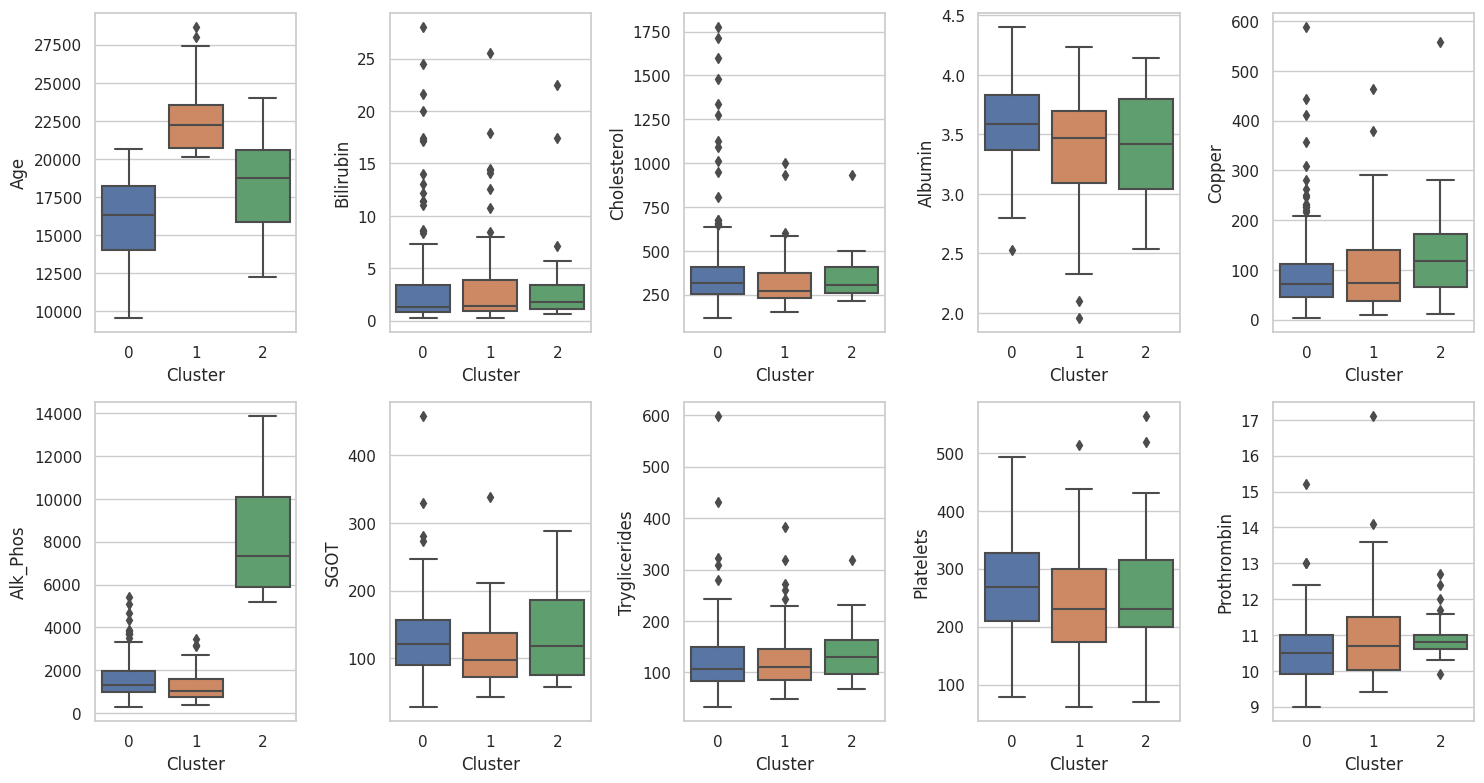

In [ ]:

# Visualisasi boxplot
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 8))
for i, feature in enumerate(features.columns):
    sns.boxplot(x='Cluster', y=feature, data=df, ax=axes[i//5, i%5])
plt.tight_layout()
plt.show()

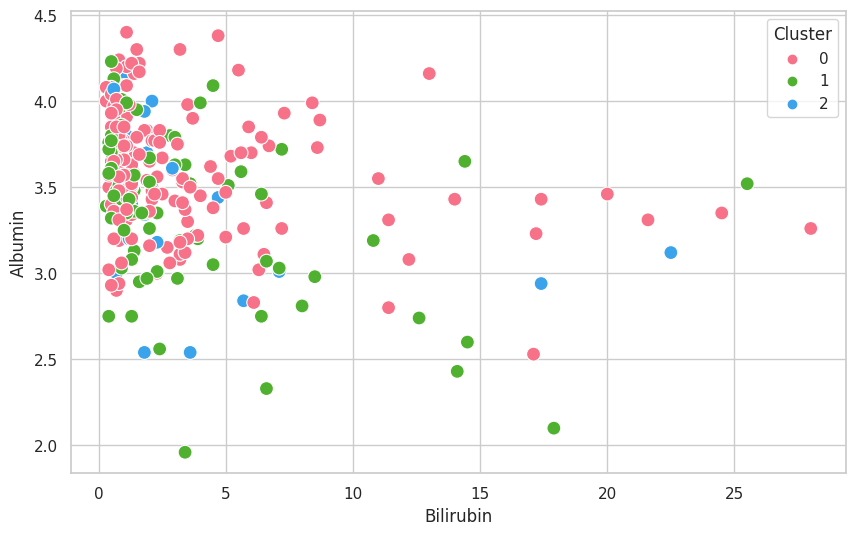

In [ ]:
# Visualisasi scatter plot berdasarkan klaster
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

palette = sns.color_palette("husl", 3)

sns.scatterplot(x='Bilirubin', y='Albumin', hue='Cluster', palette=palette, data=df, s=100)
plt.xlabel('Bilirubin')
plt.ylabel('Albumin')

plt.legend(title='Cluster')
plt.show()

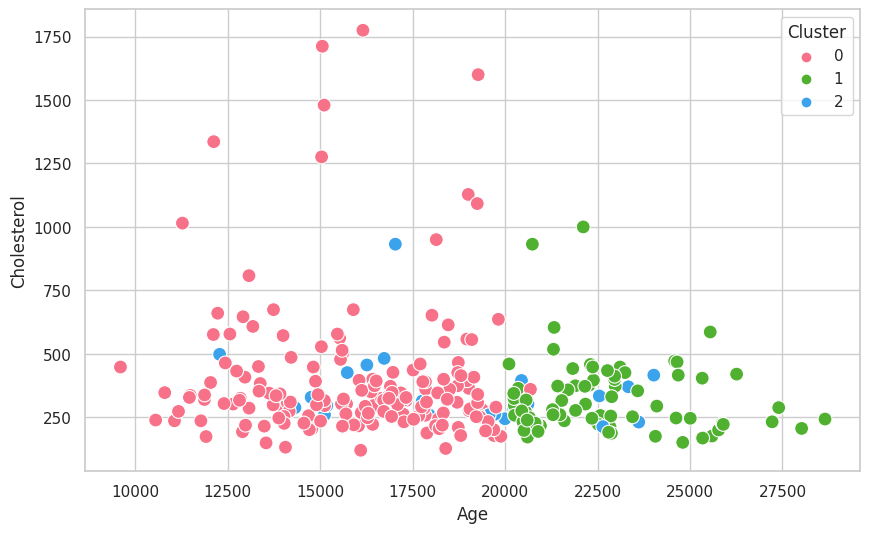

In [ ]:
# Visualisasi scatter plot berdasarkan klaster
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

palette = sns.color_palette("husl", 3)

sns.scatterplot(x='Age', y='Cholesterol', hue='Cluster', palette=palette, data=df, s=100)
plt.xlabel('Age')
plt.ylabel('Cholesterol')

plt.legend(title='Cluster')
plt.show()